In [8]:
import pandas as pd
ex7data1 = pd.read_csv('ex7data1.csv',header=None)
print(ex7data1.head())

          0         1
0  3.381563  3.389113
1  4.527875  5.854178
2  2.655682  4.411995
3  2.765235  3.715414
4  2.846560  4.175506


In [12]:
from sklearn.cluster import KMeans

X = ex7data1.as_matrix()

cluster_model = KMeans(n_clusters=3, random_state = 0).fit(X)
print(cluster_model.cluster_centers_)

[[4.34231741 5.29734923]
 [5.45459288 6.16011729]
 [2.7692839  4.02273777]]


In [13]:
print(cluster_model.labels_)

[2 0 2 2 2 0 2 1 0 0 0 0 0 0 2 1 0 2 1 0 1 0 1 0 2 2 1 1 2 0 0 1 2 0 2 1 2
 1 2 0 0 2 2 0 2 0 2 2 0 1]


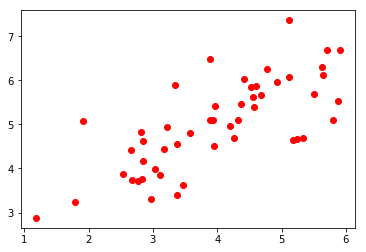

In [15]:
from matplotlib import pyplot as plt

def plot(X):
    plt.plot(X[:,0],X[:,1],'ro')
    plt.show()
    
plot(X)

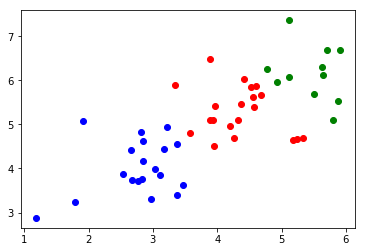

In [23]:
def visualize_kmeans(X, cluster_model):
    color = ['ro','go','bo']
    for i in range(3):
        ind = cluster_model.labels_ == i
        plt.plot(X[ind][:,0],X[ind][:,1],color[i])
    plt.show()
    
visualize_kmeans(X, cluster_model)

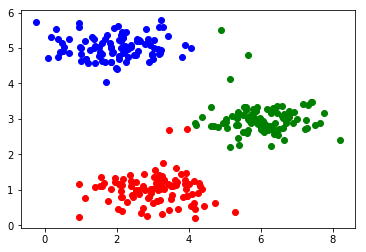

In [25]:
ex7data2 = pd.read_csv('ex7data2.csv',header=None)
X2 = ex7data2.as_matrix()
cluster_model2 = KMeans(n_clusters = 3, random_state = 0).fit(X2)
visualize_kmeans(X2, cluster_model2)

(128, 128)


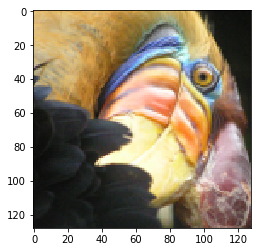

In [30]:
from PIL import Image


bird_small = Image.open("bird_small.png")
print(bird_small.size)

plt.imshow(bird_small)

In [34]:
import numpy as np

print(type(bird_small))
image_array = np.array(bird_small)
w,h,d = image_array.shape

image_array = np.reshape(image_array, (w*h,d))
print(image_array.shape)

<class 'PIL.PngImagePlugin.PngImageFile'>
(16384, 3)


In [36]:
kmeans = KMeans(n_clusters = 16, random_state=0).fit(image_array)
print(kmeans.cluster_centers_)

[[ 21.73661134  23.53899154  20.94393987]
 [220.83733177 182.34874195 115.49151551]
 [117.92394015  99.6084788   90.06608479]
 [249.14765694 240.96816976 207.74447392]
 [178.77751479 160.53964497 142.93491124]
 [110.92011019  79.02066116  48.40082645]
 [ 42.95166163  42.81873112  40.54441088]
 [245.48435923 218.12209889 159.56104945]
 [191.6536676  152.69916435  85.01671309]
 [150.0212528  127.57829978 113.94966443]
 [211.12748344 190.3692053  187.90728477]
 [162.16535433 117.3352081   51.42407199]
 [ 70.35483871  67.01612903  68.8156682 ]
 [ 98.91481481 117.00740741 165.2962963 ]
 [233.75833333 145.93125     64.59583333]
 [145.24       183.944      221.464     ]]


In [37]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

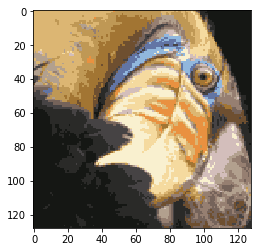

In [41]:
labels = kmeans.predict(image_array)
bird_small_16 = recreate_image(kmeans.cluster_centers_, labels, w, h)
bird_small_16 = np.array(bird_small_16, dtype=np.uint8)
plt.imshow(bird_small_16)

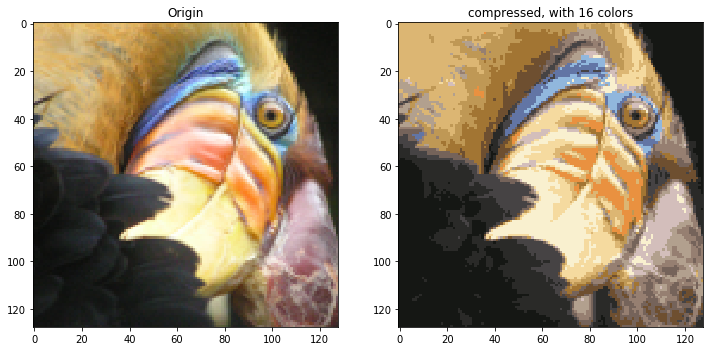

In [52]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title('Origin')
plt.imshow(bird_small)

plt.subplot(122)
plt.title('compressed, with 16 colors')
plt.imshow(bird_small_16)

plt.show()

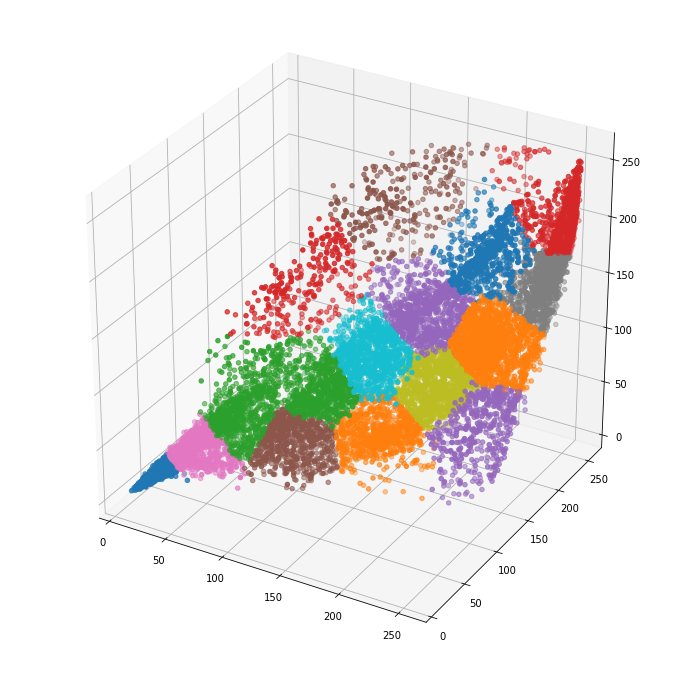

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(kmeans.cluster_centers_)):
    ia = image_array[kmeans.labels_ == i]
    ax.scatter(ia[:,0],ia[:,1], ia[:,2])
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


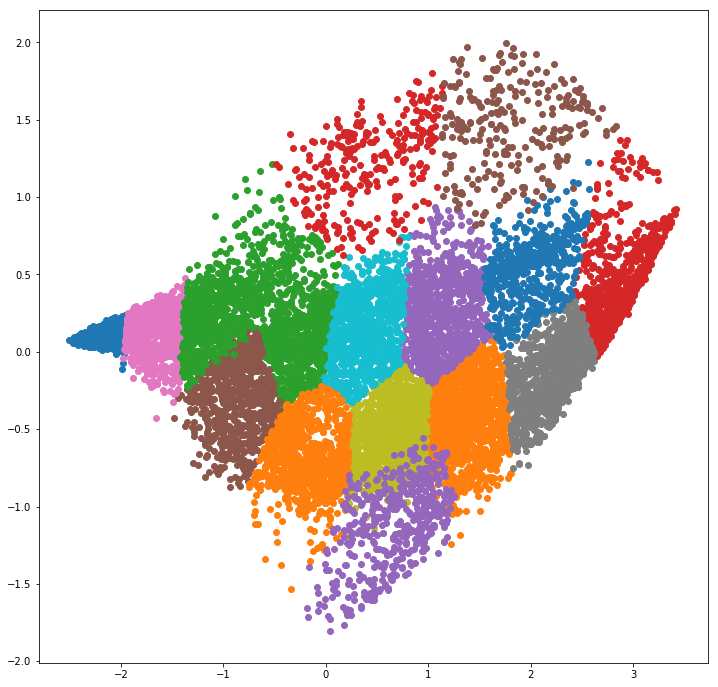

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(image_array)

x_norm = scaler.transform(image_array)

pca2 = PCA(n_components=2).fit(x_norm)

Z = pca2.fit_transform(x_norm)

plt.figure(figsize=(12,12))
for i in range(len(kmeans.cluster_centers_)):
    z = Z[kmeans.labels_ == i]
    plt.scatter(z[:,0],z[:,1],marker='o')
plt.show()